<a href="https://colab.research.google.com/github/azlu20/RealRandomness/blob/main/random_binclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
class MachineRandomText():
  #label of 0 as machine generated text
  def __init__(self, total_labels):
    self.dataset = []
    self.label = [0 for i in range(0, total_labels)]
    self.label[0] = 1
    self.unpartitioned = ""

  
  def generateNText(self, occurences, string_length):
    
    for i in range(0, occurences):
      curText = ""
      for i in range(0, string_length):
        random_int = random.randint(97, 122)
        curText += chr(random_int)
      self.unpartitioned += curText
      self.dataset.append(curText)

   

In [ ]:
class UserRandomText():
  def __init__(self, label_number, total_labels, length):
    self.dataset = []
    self.label = [0 for i in range(0, total_labels)]
    self.label[label_number] = 1
    self.i = 0
    self.length = length
    self.unpartitioned = ""
  
  def generateNText(self, occurences, string_length):
    curText = input(f"Type {occurences * string_length}")


    while occurences > 0:
      if self.i+self.length < len(curText):
        if self.splitUserInput(curText, string_length):
          occurences -= 1
      else:
        curText = input(f"Type {occurences * string_length}")
        self.i = 0
    
  
  def splitUserInput(self, curText, string_length):
      counted = 0
      string = ""
      while counted < self.length and self.i < len(curText):
        if ord(curText[self.i]) < 97 or ord(curText[self.i]) > 122:
          self.i+=1
          continue
        else:
          string += curText[self.i]
          self.i+=1
          counted += 1

      if counted == self.length:
        self.unpartitioned +=string
        self.dataset.append(string)
        return True
      
      else:
        return False



In [ ]:
class IdentifyClass():
  def __init__(self, labels):
    self.num_labels = labels
    self.inputs = []
  

  def inputNewLabel(self, text):
    averages = np.zeros(26)
    for ele in text:
      ind = ord(ele)-97
      averages[ind] += 1
    averages = averages/len(text)
    self.inputs.append(averages)

  def checkExistingLabel(self, text):
    averages = np.zeros(26)
    min_diff_squared = 1000000
    min_label = -1
    for ele in text:
      ind = ord(ele)-97
      averages[ind] += 1
    for idx, label in enumerate(self.inputs):
      diff = np.subtract(label, averages)
      diff_squared = np.sum((np.absolute(diff)))

      if diff_squared < min_diff_squared:
        min_label = idx
        min_diff_squared = diff_squared
    
    return min_label
  



In [ ]:
class FingerDetect(IdentifyClass):
  def __init__(self, labels):
    super().__init__(labels)
    self.weight_dict = {"f": 1, "d": 2, "s": 3, "a": 4, "j":1, "k":2, "l":3, "q": 4*2, "w": 3*2, "e": 2*2, "r": 2, "t": 2.5, "y":2.5, "u":2, "i": 2*2, "o": 3*2, "p": 4*2, "z": 2.5*4, "x": 2.5*3, "c": 2.5*2, "v": 2.5, "b": 2.5, "n": 2.5 * 2, "m": 2.5*3}
 
  
  def inputNewLabel(self, text):
    total_weight = 0
    for ele in text:
      if ele in self.weight_dict:
        weight = self.weight_dict[ele]
        total_weight += weight
    average_weight = total_weight/len(text)
    self.inputs.append(average_weight)
  
  def checkExistingLabel(self, text):
    total_weight = 0
    min_val = None
    min_label = None
    for ele in text:
      if ele in self.weight_dict:
        weight = self.weight_dict[ele]
        total_weight += weight
    average_weight = total_weight/len(text)
    print(average_weight)
    
    for idx, label in enumerate(self.inputs):
      diff = abs(average_weight - label)
      if min_val is not None:
        if diff < min_val:
          min_val = diff
          min_label = idx
      else:
        min_val = diff
        min_label = idx
    return min_label

In [ ]:
input_length = 3

In [ ]:
o_user = UserRandomText(label_number=1, total_labels=2, length=input_length)
o_user.generateNText(2000, input_length)


Type 6000ifulhdasfkajsdfkljashdfklajhweljfhbwaelufawgeulfygwaefuygweuogqyeiruflakjsdnsvbjchvbjkcvdhaiuhiuagiaoefuoawygeuowgefwtaedfiuaydfiasuhdfaiuhdfasjdfjashdfasjdegyeuoyfgwaelfweufwafaedyfalefawlefaf;oiahsdifuhasldkjhfasldjhfjvkxjiwueiueyhfaiwoehfaoiuefiasoudfiasuhdfiusdfiuashdiofuadiofuasdiofuyasidufawueyh8oqeyyfqoe8yrgtqoerygaudfiaushdfasdhfjxckvjzxcjvnsdhfiasudfiasudfaspoidfupaweupwewoiefwoauefioausdfiasdfsdkjhsahdaudhfisaudiaousdfoaisudfipwaueyfhoweygfuoyrgfiuashdfjsadjbvjbjhasdpifhasifasfiusahifdouasdfuasdiofuahdiffasdf9as8ydfao8sfoasuiouyfiufyiofaskdhfakjsnnnvxcjvhiuahfailsdhfakjsdhfkajshdfofhqileuhwqeilfuhqwileufhidhfakljdfaskjdfaksjdfksjadflasjdflsajdfalsjdalksjdflkasjdjcjbjdfasldjhfasdklfhadfheiouqhweygqweiufhwieflsadflkjasdhflasjdfljbdnbdjfhadifasdlkfjadlkfjasdfashfdauiehfpqiwehfqiurhfquoygrquoirhquyrgqruhgiugyhiadmbduifhalkdjfasldjjcbasdifiuqhewuoqgyrfuyrguqeyrguhrflsaklfjashdlkfjhasdlkfjasldkjfasldkjfeiuahiwuefawefoqgyqriuhqerififleuahldfhasdjsakjnsakjdfnsdsaljdnasjdnajb

In [ ]:
o_machine = MachineRandomText(total_labels=2)
o_machine.generateNText(2000, input_length)

In [ ]:
validation_machine = MachineRandomText(total_labels=2)
validation_machine.generateNText(100, input_length)

In [ ]:
heuristic_1 = IdentifyClass(2)
heuristic_1.inputNewLabel(o_user.unpartitioned)
heuristic_1.inputNewLabel(o_machine.unpartitioned)
print(heuristic_1.checkExistingLabel(validation_machine.unpartitioned))


print(heuristic_1.inputs[0])


1
[0.11933333 0.0075     0.00516667 0.108      0.03916667 0.12183333
 0.01966667 0.08833333 0.06933333 0.075      0.05183333 0.03666667
 0.0025     0.01       0.0265     0.013      0.02016667 0.0135
 0.0765     0.00083333 0.05233333 0.006      0.018      0.003
 0.015      0.00083333]


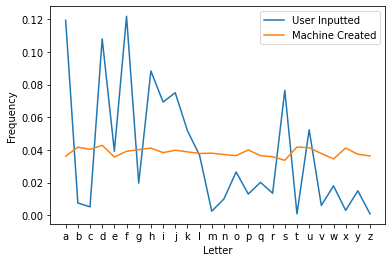

In [ ]:

x_vals = [chr(97 + i) for i in range(0, 26)]
plt.plot(x_vals, heuristic_1.inputs[0], label="User Inputted")
plt.plot(x_vals, heuristic_1.inputs[1], label="Machine Created")
plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.legend()


In [ ]:
heuristic_2 = FingerDetect(2)
heuristic_2.inputNewLabel(o_user.unpartitioned)
heuristic_2.inputNewLabel(o_machine.unpartitioned)
print(heuristic_2.checkExistingLabel("akdjfalskdjvkcnvkjadfpjqhgioqrhyqidfjsdjfalskdfjaighwouthwrifhsdkcjkjadjfal;sdkjflkldfjahkdlfjhaskdlfj"))
print(heuristic_2.inputs)


2.4411764705882355
0
[2.6300833333333333, 3.8310833333333334]


In [ ]:
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,50)
    self.fc2 = nn.Linear(50,100)
    self.fc3 = nn.Linear(100,1)
    
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [ ]:
learning_rate = 0.0001
epochs = 700
model = Net(input_shape=input_length)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate, weight_decay= 1e-5)
loss_fn = nn.BCELoss()

In [ ]:
y = []
x = []
a = 0
b = 0

for k in range(0, 3700):
  select = random.randint(0,1)
  if select == 0:
    x.append(o_machine.dataset[a])
    y.append(0)
    a+=1
  else:
    x.append(o_user.dataset[b])
    y.append(1)
    b+=1

print(len(x))

3700


In [ ]:
new_x = []
for ele in x:
  cur = []
  for char in ele:
    cur.append(ord(char)-97)
  new_x.append(cur)

x = new_x
print(x)

[[7, 5, 19], [8, 5, 20], [17, 0, 24], [12, 10, 25], [16, 21, 15], [0, 4, 24], [0, 3, 13], [11, 7, 3], [0, 18, 5], [10, 0, 9], [8, 19, 6], [18, 3, 5], [10, 11, 9], [0, 18, 7], [0, 6, 1], [4, 3, 4], [14, 3, 25], [16, 2, 3], [2, 17, 24], [17, 5, 1], [3, 5, 10], [11, 0, 9], [17, 7, 22], [18, 3, 7], [3, 22, 13], [1, 3, 4], [7, 22, 4], [11, 17, 6], [11, 9, 5], [7, 1, 22], [0, 4, 11], [4, 15, 22], [20, 5, 0], [6, 20, 3], [17, 10, 13], [22, 6, 4], [7, 19, 17], [20, 11, 5], [24, 6, 22], [17, 11, 21], [2, 4, 6], [14, 25, 13], [0, 4, 5], [20, 24, 6], [22, 4, 20], [14, 6, 16], [15, 8, 4], [24, 4, 8], [17, 20, 5], [11, 0, 10], [13, 21, 6], [9, 18, 3], [20, 7, 21], [13, 18, 21], [1, 9, 2], [3, 25, 10], [7, 21, 1], [9, 10, 2], [5, 8, 9], [11, 5, 5], [21, 3, 7], [11, 8, 25], [0, 8, 20], [21, 11, 15], [7, 8, 20], [4, 0, 4], [23, 16, 10], [0, 6, 8], [12, 2, 10], [0, 14, 4], [5, 20, 14], [0, 22, 24], [0, 14, 22], [6, 4, 20], [4, 9, 0], [14, 22, 6], [19, 6, 16], [4, 5, 22], [19, 0, 4], [3, 5, 8], [20, 0, 

In [ ]:
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
y = y.unsqueeze(1)
print(y.shape)

torch.Size([3700, 1])


In [ ]:

losses = []
accur = []
training_size = 3600
testing_loss = torch.FloatTensor([1000])
i = 0
while testing_loss.data > 0.30:
  for j in range(0, training_size):
    
    x_train = x[j]
    y_train = y[j]


    output = model(x_train)
    output = output.unsqueeze(1)

    loss = loss_fn(output,y_train.reshape(-1,1))
 

    predicted = model(torch.tensor(x,dtype=torch.float32))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if i%50 == 0:
    losses.append(loss)
    print("test loss: {}".format(testing_loss))
    print("epoch {}\tloss : {}".format(i,loss))
  
  test_predicted = model(x[training_size::])
  testing_loss = loss_fn(test_predicted, y[training_size::])
  i+=1

  

<ipython-input-77-647bdff44189>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted = model(torch.tensor(x,dtype=torch.float32))


test loss: tensor([1000.])
epoch 0	loss : 0.8271127343177795
test loss: 0.5396196842193604
epoch 50	loss : 0.5136005282402039
test loss: 0.5247434377670288
epoch 100	loss : 0.5270731449127197
test loss: 0.5195404291152954
epoch 150	loss : 0.5036362409591675
test loss: 0.5159302353858948
epoch 200	loss : 0.496356338262558
test loss: 0.5136367678642273
epoch 250	loss : 0.48720917105674744
test loss: 0.5097549557685852
epoch 300	loss : 0.4772953391075134
test loss: 0.506089448928833
epoch 350	loss : 0.46558529138565063
test loss: 0.5035054087638855
epoch 400	loss : 0.4600585401058197
test loss: 0.4999019205570221
epoch 450	loss : 0.4477069079875946
test loss: 0.49723368883132935
epoch 500	loss : 0.4320468306541443
test loss: 0.4941714406013489
epoch 550	loss : 0.4136645793914795
test loss: 0.49208924174308777
epoch 600	loss : 0.3922692537307739
test loss: 0.4923801124095917
epoch 650	loss : 0.3835844397544861
test loss: 0.49384522438049316
epoch 700	loss : 0.3767056465148926
test loss: 0.

In [ ]:
print(losses)

[tensor(0.0118, grad_fn=<BinaryCrossEntropyBackward0>), tensor(0.0010, grad_fn=<BinaryCrossEntropyBackward0>), tensor(0.0004, grad_fn=<BinaryCrossEntropyBackward0>), tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>), tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>), tensor(0.0001, grad_fn=<BinaryCrossEntropyBackward0>), tensor(9.2988e-05, grad_fn=<BinaryCrossEntropyBackward0>), tensor(7.7608e-05, grad_fn=<BinaryCrossEntropyBackward0>), tensor(6.6283e-05, grad_fn=<BinaryCrossEntropyBackward0>), tensor(5.7818e-05, grad_fn=<BinaryCrossEntropyBackward0>), tensor(5.1142e-05, grad_fn=<BinaryCrossEntropyBackward0>), tensor(4.5777e-05, grad_fn=<BinaryCrossEntropyBackward0>), tensor(4.1366e-05, grad_fn=<BinaryCrossEntropyBackward0>), tensor(3.7671e-05, grad_fn=<BinaryCrossEntropyBackward0>)]


In [ ]:
new_losses = []
for ele in losses:
  new_losses.append(ele.detach().numpy())

print(new_losses)

NameError: ignored

Text(0, 0.5, 'loss')

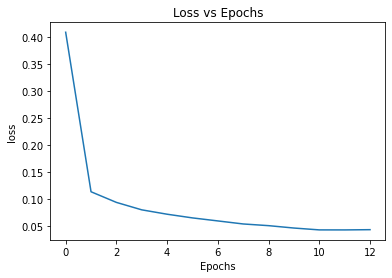

In [ ]:
plt.plot(new_losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [ ]:
predicted = model(x[42])
print(predicted)

tensor([0.6240], grad_fn=<SigmoidBackward0>)


In [ ]:
new_user = UserRandomText(label_number=1, total_labels=2, length = input_length)
new_user.generateNText(10, input_length)

Type 50dfuiasdfiuasodfiaosjdfasjdfl;vknmkcnvx,cvaskdj;fgadgpoiuhqrqpiughfjkasdklfj


In [ ]:
new_machine = MachineRandomText(total_labels = 2)
new_machine.generateNText(20, input_length)

In [ ]:
new_user_numberized = []
for ele in new_user.dataset:
  cur = []
  for char in ele:
    cur.append(ord(char)-97)
  new_user_numberized.append(cur)


print(new_user_numberized)

[[3, 5, 20, 8, 0], [18, 3, 5, 8, 20], [0, 18, 14, 3, 5], [8, 0, 14, 18, 9], [3, 5, 0, 18, 9], [3, 5, 11, 21, 10], [13, 12, 10, 2, 13], [21, 23, 2, 21, 0], [18, 10, 3, 9, 5], [6, 0, 3, 6, 15]]


In [ ]:
new_machine_numberized = []
for ele in new_machine.dataset:
  cur = []
  for char in ele:
    cur.append(ord(char)-97)
  new_machine_numberized.append(cur)


print(new_machine_numberized)

[[7, 9, 24, 2, 5], [2, 10, 17, 6, 12], [19, 15, 14, 13, 24], [4, 6, 0, 6, 9], [11, 14, 17, 17, 8], [19, 12, 13, 21, 0], [22, 4, 6, 16, 2], [18, 4, 8, 2, 18], [13, 5, 23, 2, 11], [9, 8, 5, 13, 5], [24, 8, 6, 7, 2], [5, 6, 25, 11, 1], [18, 21, 18, 22, 24], [24, 13, 13, 10, 6], [6, 19, 20, 10, 10], [2, 23, 9, 8, 18], [14, 15, 10, 20, 12], [5, 13, 20, 20, 16], [19, 9, 13, 21, 7], [8, 19, 18, 1, 14]]


In [ ]:
new_user_numberized = torch.FloatTensor(new_user_numberized)

In [ ]:
new_machine_numberized = torch.FloatTensor(new_machine_numberized)

In [ ]:
predicted = model(new_user_numberized)
count = 0


for i in range(0, predicted.shape[0]):

  if predicted[i].data >= 0.5:
      count +=1

print(count)
  


7


In [ ]:
predicted = model(new_machine_numberized)
count = 0


for i in range(0, predicted.shape[0]):

  if predicted[i].data <= 0.5:
      count +=1
print(predicted)
print(count)



tensor([[0.6963],
        [0.5992],
        [0.1963],
        [0.7532],
        [0.1311],
        [0.2298],
        [0.8230],
        [0.4932],
        [0.6524],
        [0.4658],
        [0.7267],
        [0.4163],
        [0.0225],
        [0.2917],
        [0.3874],
        [0.5135],
        [0.0793],
        [0.1122],
        [0.0971],
        [0.2711]], grad_fn=<SigmoidBackward0>)
13
